In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [73]:
data = pd.read_csv('../data/delaney_solubility_with_descriptors.csv')
data.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [74]:
y_value = data['logS']
x_values = data.iloc[:, :4]

In [75]:
x_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
dtypes: float64(4)
memory usage: 35.9 KB


In [76]:
from sklearn.model_selection import train_test_split    

x_train, x_test, y_train, y_test = train_test_split(x_values, y_value, test_size=0.2, random_state=100)

In [77]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [78]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [79]:
from sklearn.metrics import mean_squared_error, r2_score
## Mean squared error 
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred) 
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
## R2 score 
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [85]:
results = pd.DataFrame({"Linear Regression" : [lr_train_mse, lr_test_mse, lr_train_r2, lr_test_r2]}).transpose()
results.columns = ["MSE (Train)", "MSE (Test)", "R2 (Train)", "R2 (Test)"]
results

,MSE (Train),MSE (Test),R2 (Train),R2 (Test)
Linear Regression,1.007536,1.020695,0.764505,0.789162


[]

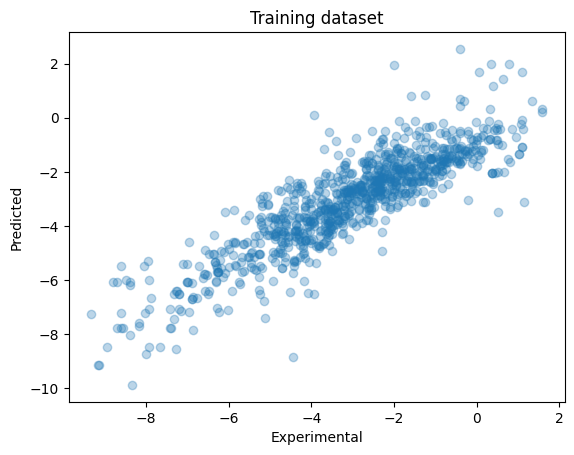

In [86]:
plt.scatter(y_train, y_lr_train_pred, alpha=0.3)
plt.ylabel("Predicted")
plt.xlabel("Experimental")
plt.title("Training dataset")
plt.plot()

[]

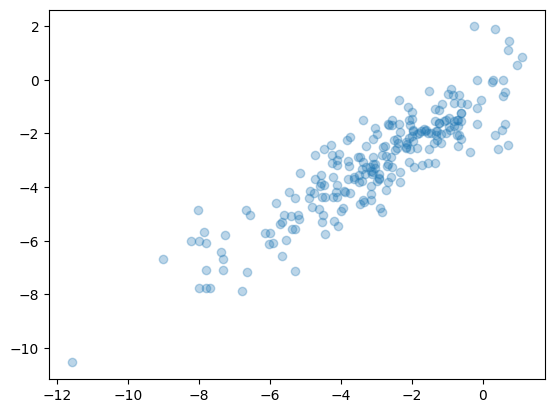

In [90]:
plt.scatter(y_test, y_lr_test_pred, alpha=0.3)
plt.plot()